<a href="https://colab.research.google.com/github/udbtsteve/PUS2022_SBeattie/blob/main/Copy_of_HW4_responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUS2022 Homework #4 - Steven Beattie

# 0 Install geospatial libraries

In [ ]:
!pip install geopandas
!apt install python3-rtree 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 9.6 MB/s 
     |████████████████████████████████| 6.3 MB 38.5 MB/s 
     |████████████████████████████████| 16.7 MB 296 kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1

## 0.1 Import initial libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# 1 Working with a Shape File of Census Tracts

### 1.1 Loading Census Tract GeoJSON File


In [ ]:
ct_gdf = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON")

In [ ]:
print(ct_gdf.head())
ct_gdf.info()

  ntacode     shape_area                                    ntaname  \
0    SI22  2497009.71359  West New Brighton-New Brighton-St. George   
1    MN19  1906016.44662                    Turtle Bay-East Midtown   
2    MN17  1860992.68163                      Midtown-Midtown South   
3    MN17  1864600.43538                      Midtown-Midtown South   
4    MN17  1890907.25105                      Midtown-Midtown South   

      shape_leng      boro_name  puma  ct2010 boro_code cdeligibil  \
0  7729.01679383  Staten Island  3903  000900         5          E   
1  5534.20030825      Manhattan  3808  009800         1          I   
2  5687.80243891      Manhattan  3807  010200         1          I   
3  5693.03636707      Manhattan  3807  010400         1          I   
4  5699.86064037      Manhattan  3807  011300         1          I   

  boro_ct2010 ctlabel                                           geometry  
0     5000900       9  MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...  
1 

## 1.2 Coordinate systems, projections, and transformations : 

### Visualize the Census Tract boundaries colored by boroughs

Text(62.927694290064196, 0.5, 'longitude (deg')

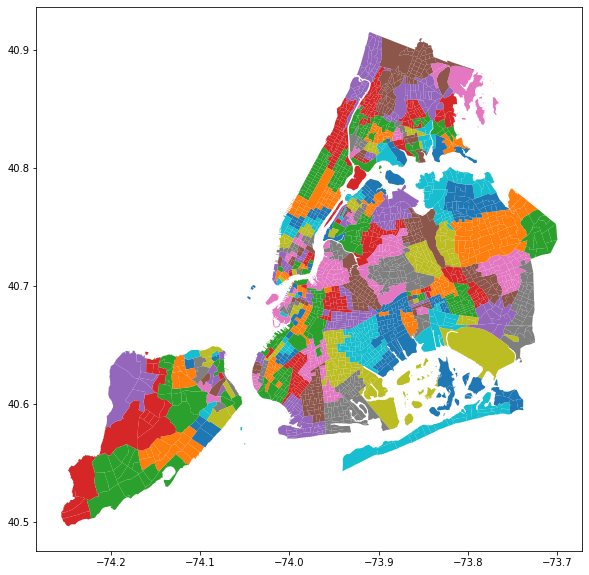

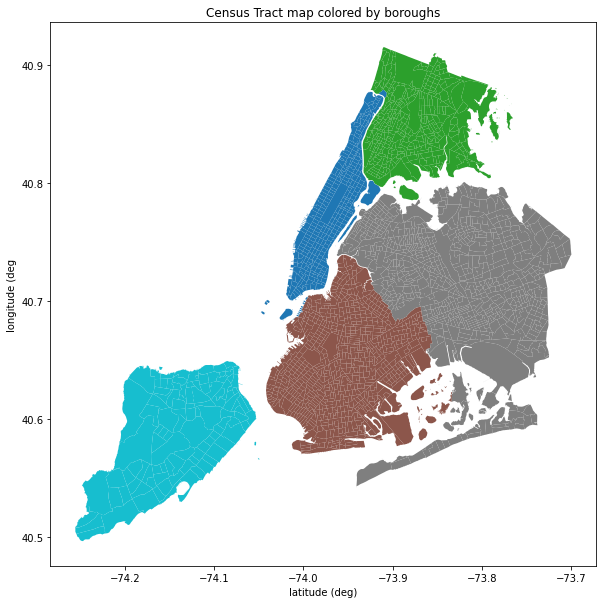

In [ ]:
boro_plt = ct_gdf.plot(column='ctlabel', figsize = (10,10))
boro_plt = ct_gdf.plot(column='boro_code', figsize = (10,10))
boro_plt.set_title("Census Tract map colored by boroughs")
boro_plt.set_xlabel("latitude (deg)")
boro_plt.set_ylabel("longitude (deg")



> Fig.1: Map of NYC, colored by census tract

> Fig.2: Map of NYC, colored by borough


### Measure Areas

...


* Calculate the total area of NYC in miles squared. 

* On epsg.io  look up the EPSG:2263. What is the accuracy when this projection is used in NYC?



In [ ]:
ct_crs = ct_gdf.to_crs("EPSG:2263")
sq_ft_mi_CF = np.square(5280)
ct_crs["shape_areami2"] = (ct_crs.geometry.area / sq_ft_mi_CF)
NYC_Area = np.sum(ct_crs["shape_areami2"])
print ('total NYC land area: {:.0f} (mi^2)\n'.format(NYC_Area)) # from ft2 to mi2 #epsg=2263 is US feet
print('According to epsg.io, EPSG:2263 (NYC) is accurate to within 4 meters')
print('--> According to the internet, the land area of NYC is 304.8 sq.mi')


total NYC land area: 302 (mi^2)

According to epsg.io, EPSG:2263 (NYC) is accurate to within 4 meters
--> According to the internet, the land area of NYC is 304.8 sq.mi


### Choropleths of NYC


In [ ]:
ct_crs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ntacode        2165 non-null   object  
 1   shape_area     2165 non-null   object  
 2   ntaname        2165 non-null   object  
 3   shape_leng     2165 non-null   object  
 4   boro_name      2165 non-null   object  
 5   puma           2165 non-null   object  
 6   ct2010         2165 non-null   object  
 7   boro_code      2165 non-null   object  
 8   cdeligibil     2164 non-null   object  
 9   boro_ct2010    2165 non-null   object  
 10  ctlabel        2165 non-null   object  
 11  geometry       2165 non-null   geometry
 12  shape_areami2  2165 non-null   float64 
dtypes: float64(1), geometry(1), object(11)
memory usage: 220.0+ KB


In [ ]:
ct_crs["shape_area"] = pd.to_numeric(ct_crs["shape_area"], errors="coerce")

* make a coropleth using "shape_area"

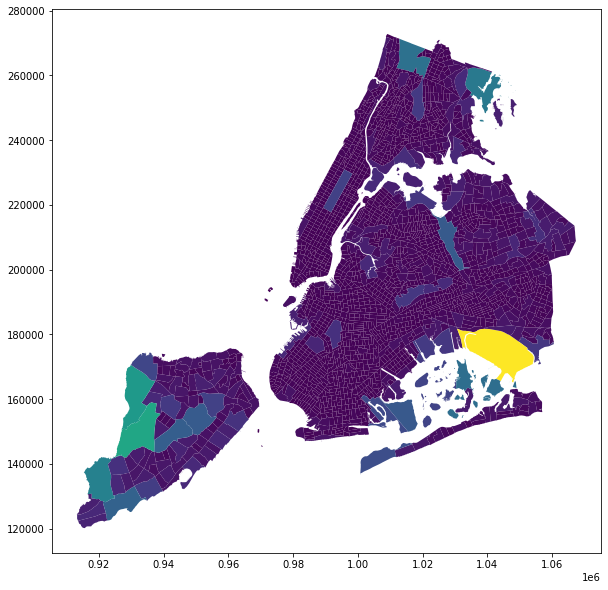

In [ ]:
ct_crs.plot(column = "shape_area", figsize=(10,10))

> Fig.3: Cloropleth of NYC, with color corresponding to census tract area

* Now use your column "shape_areami2" - the colors should be mapped the same way

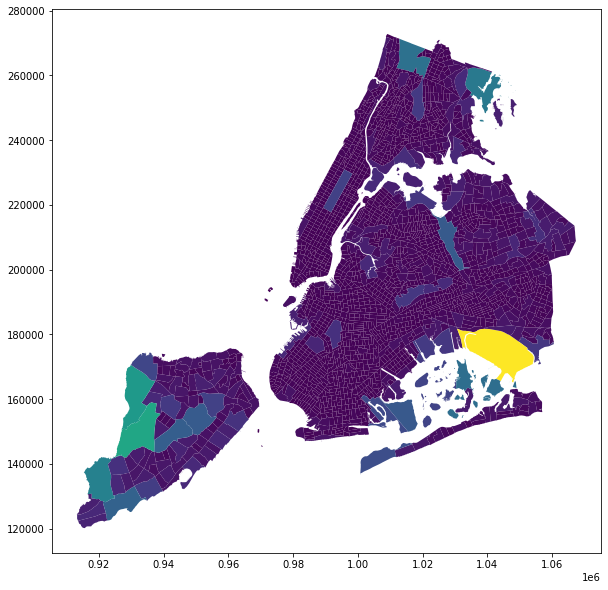

In [ ]:
plt = ct_crs.plot(column = "shape_areami2", figsize=(10,10))

> Fig.4: Cloropleth of NYC, with color corresponding to census tract area in miles squred

* Now lets put some numerical values to the colors. you can do by adding the argument 

```legend=True```

 to the choropleth gdp.plot() call

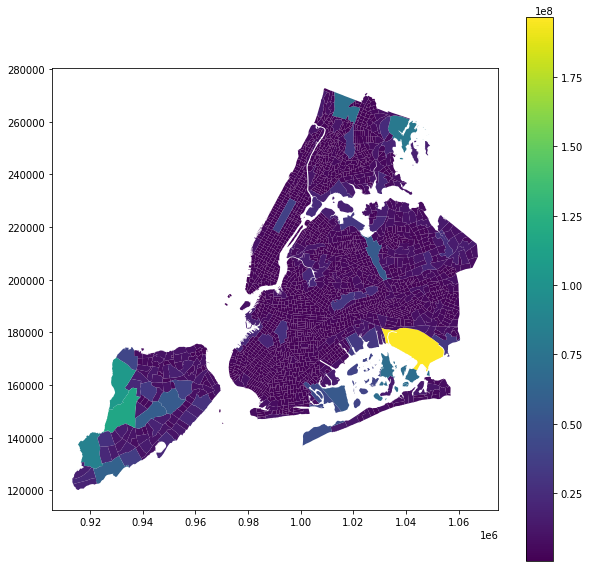

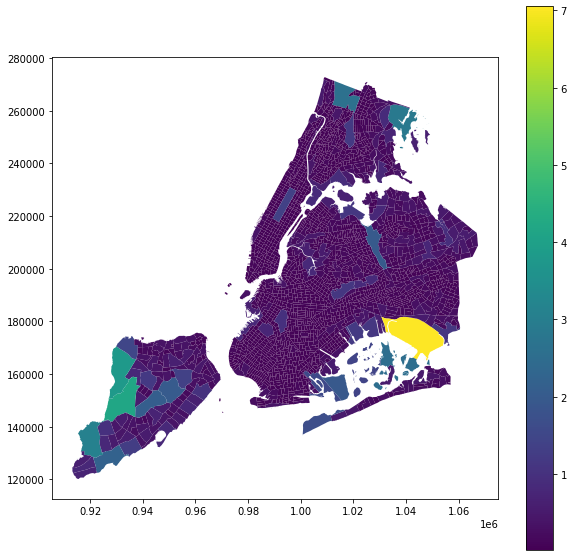

In [ ]:
ct_crs.plot(column="shape_area", legend=True, figsize=(10,10))
ct_crs.plot(column="shape_areami2", legend=True, figsize=(10,10))

> Fig.5: Cloropleth of NYC, with color corresponding to census tract area in square feet, legend added

> Fig.6: Cloropleth of NYC, with color corresponding to census tract area in square miles, legend added

Often a more useful way to read numers associated to colors is to use quantiles. For this yuo need to install 

```mapclassify```

In [ ]:
!pip install mapclassify
import mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Use mapclassify to plot the distribution quartiles

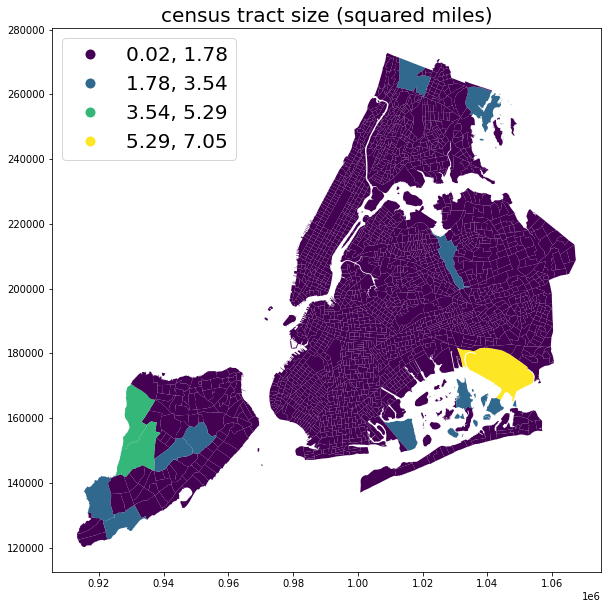

In [ ]:
plt = ct_crs.plot(column='shape_areami2', cmap='viridis', alpha=1,
              linewidth=0.1, scheme="Equal_interval", figsize=(10,10),
              legend=True, k=4, legend_kwds={'loc': 'upper left', 'fontsize':20});


plt.set_title("census tract size (squared miles)", fontsize=20);

> Fig.7: Cloropleth of NYC, color corresponds to quartiles of quare-mile area data

# 2 Explore CitiBike data

### 2.1 Load CitiBike data for 9/2013

In [ ]:
cb201609 = pd.read_csv('https://s3.amazonaws.com/tripdata/201609-citibike-tripdata.zip', index_col='starttime')
cb201609.head()

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
9/1/2016 00:00:02,975,9/1/2016 00:16:18,312,Allen St & Stanton St,40.722055,-73.989111,313,Washington Ave & Park Ave,40.696102,-73.967510,22609,Subscriber,1985.0,1
9/1/2016 00:00:04,1220,9/1/2016 00:20:25,316,Fulton St & William St,40.709560,-74.006536,239,Willoughby St & Fleet St,40.691966,-73.981302,16966,Subscriber,1977.0,2
9/1/2016 00:00:19,308,9/1/2016 00:05:27,479,9 Ave & W 45 St,40.760193,-73.991255,448,W 37 St & 10 Ave,40.756604,-73.997901,25601,Subscriber,1983.0,1
9/1/2016 00:00:25,250,9/1/2016 00:04:35,297,E 15 St & 3 Ave,40.734232,-73.986923,487,E 20 St & FDR Drive,40.733143,-73.975739,22094,Subscriber,1953.0,1
9/1/2016 00:00:25,439,9/1/2016 00:07:45,494,W 26 St & 8 Ave,40.747348,-73.997236,533,Broadway & W 39 St,40.752996,-73.987216,16319,Subscriber,1985.0,1


## 2.2 Explore the dataset, you know how!

In [ ]:
print(cb201609.columns)
print(" ")
cb201609.info()

Index(['tripduration', 'stoptime', 'start station id', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       'bikeid', 'usertype', 'birth year', 'gender'],
      dtype='object')
 
<class 'pandas.core.frame.DataFrame'>
Index: 1648856 entries, 9/1/2016 00:00:02 to 9/30/2016 23:59:51
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1648856 non-null  int64  
 1   stoptime                 1648856 non-null  object 
 2   start station id         1648856 non-null  int64  
 3   start station name       1648856 non-null  object 
 4   start station latitude   1648856 non-null  float64
 5   start station longitude  1648856 non-null  float64
 6   end station id           1648856 non-null  int64  
 7   end station name         1648856 non-null  obje

## 2.3 Map CitiBike Data at the census tract level

### Create a stations dataframe with spatial info

In [ ]:
cbstations = cb201609.groupby('start station id').first()
cbstations = cbstations.dropna()

### Create CitiBike station Geometry (Point) from Coordinates (Lat & Lon)

In [ ]:
cbstations['lonlat'] = gpd.points_from_xy(cbstations['start station longitude'], cbstations['start station latitude'], crs="EPSG:2263")
# cbstations['lonlat'] = cbstations.apply(.....
cbstations['lonlat']

start station id
72      POINT (-73.994 40.767)
79      POINT (-74.007 40.719)
82      POINT (-74.000 40.711)
83      POINT (-73.976 40.684)
116     POINT (-74.001 40.742)
                 ...          
3431    POINT (-73.978 40.747)
3432    POINT (-73.977 40.663)
3434    POINT (-73.977 40.790)
3435    POINT (-73.996 40.719)
3436    POINT (-74.010 40.721)
Name: lonlat, Length: 616, dtype: geometry

In [ ]:
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat
start station id,,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2,POINT (-73.994 40.767)
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2,POINT (-74.007 40.719)
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1,POINT (-74.000 40.711)
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2,POINT (-73.976 40.684)
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1,POINT (-74.001 40.742)


### plot the stations

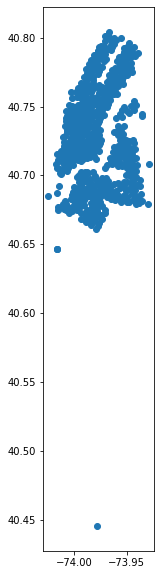

In [ ]:
cbstations = gpd.GeoDataFrame(cbstations)
cbstations["geometry"] = cbstations['lonlat']
cbstations = cbstations.set_crs(4326, allow_override = True)
cbstations.plot(figsize = (10, 10))

> Fig.8: A poor plot of citibike locations in NYC with data in this dataset



convert the geometry projection to the same one you used for the NYC census tracts and replot with the census tracts map in the background


In [ ]:
# f, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_gdf.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');

NameError: ignored

> Fig.9: NYC citibike station locations (for which we have data) overlaid on a NYC census tract map

### cleaning data

In [ ]:
cbstations = cbstations[cbstations['lonlat'].y > 40.475]
#replot
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_gdf.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');

> Fig.10: NYC citibike station locations (for which we have data) on NYC census tract map, outlier station location removed

### zoom into the relevant area 

zoom-in into the relevant area using ```ax.set_xlim()``` and ```ax.set_ylim()```

In [ ]:
#replot 
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
xLims = (np.amin(cbstations['lonlat'].x), np.amax(cbstations['lonlat'].x))
xMar = np.abs(xLims[1] - xLims[0]) * 0.1
yLims = (np.amin(cbstations['lonlat'].y), np.amax(cbstations['lonlat'].y))
yMar = np.abs(yLims[1] - yLims[0]) * 0.1
ax.set_xlim(xLims[0] - xMar, xLims[1] + xMar)
ax.set_ylim(yLims[0] - yMar, yLims[1] + yMar)
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_gdf.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');

> Fig.11: Zoomed-in plot of NYC station citibike locations w/ data in our dataset, overlaid on plot of NYC census tracts

# 3 Assigning points to polygons


## 3.1 Assign each station to a Borough

### Intrsect the census tract and citi bikes geometries manually

``` gdp.ct_shape.geometry.intersect```

First, let me do this by intersecting the shapes "manually" in a for loop. This should be transparent as far as the syntax go but it is very computationally inefficient


In [ ]:
cbstations["boro_name"] = ''
# check for each citibike stations to see what CT they are belong to
for i in cbstations.index:
    a = ct_gdf[ct_gdf.geometry.intersects(
        cbstations.loc[i].geometry)]["boro_name"].values[0]
    
    cbstations.loc[i,'boro_name'] = a


In [ ]:
cbstations.head()

### overplot the map locations on top of the census tract boundaries in the zoom in version (as before) but this time color the points by NYC Borough

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
xLims = (np.amin(cbstations['lonlat'].x), np.amax(cbstations['lonlat'].x))
xMar = np.abs(xLims[1] - xLims[0]) * 0.1
yLims = (np.amin(cbstations['lonlat'].y), np.amax(cbstations['lonlat'].y))
yMar = np.abs(yLims[1] - yLims[0]) * 0.1
ax.set_xlim(xLims[0] - xMar, xLims[1] + xMar)
ax.set_ylim(yLims[0] - yMar, yLims[1] + yMar)
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_gdf.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, column = 'boro_name', legend = True);

> Fig.12: NYC citibike station locations, overlaid on NYC census tracts, with stations colored according to borough

## 3.2 create a colopleth of NYC census tracts where the color maps to the number of citibike stations


### Perform a spatial join

Perfoming an $n \times m$ intersection test is horrifically inefficient and slow. Spatial joins use an R-tree for spatial indexing to rapidly join the tables on their geometries. 

Spatial joins operate on objects with eastings and northings, i.e., you must use two geodataframs with the same CRS, and that needs ot be a CRS expressed with dimensioned lengths. This will NOT work on data expressed in lat/long.

use 

```geopandas.tools.sjoin()``` 
passing to it ct_shape and cbstations to get a dataframe that for every station row has the census tract value in a ```boro_ct2010``` column

In [ ]:
cbstationsWct = gpd.tools.sjoin(ct_gdf, cbstations)
cbstationsWct

### groupby the geodataframe resulting from the spatial join grouping based on the census tract (e.g. use "boro_ct2010") and _count_ the number of station per boro_ct2010 value



### merge the geodataframe resulting from the spatial join + groupby  with the original census tract geodataframe. NOTE: you should remove the geometry column from the first dataframe before you merge cause you want the geometry to be inherited from the census tracts geodataframe. In fact, from the first geodataframe, you need _only_ one column that contains the number of stations for that geometry group

### plot the census tracts in the background (in black and white) and overplot a coropleth of the number of stations per census tract: the latter is the geodataframe you produced above plotted with the column argument set to the column name of the column that contains the number of stations information

.... YOU ARE DONE!!

In [ ]:
ctbycs = ct_gdf.merge(cbstationsWct.groupby("boro_ct2010").count()[["ntacode"]], 
                        right_index=True, left_on="boro_ct2010")
ax = ct_gdf.plot(ec="k", fc="w", figsize=(10,10))
# print(ctbycs['ntacode_y'].head())
ctbycs.plot(column="ntacode_y", legend=True, ax=ax)

# Not sure what is more confusing; that the park appears to be its own census tract,
# or that it appears to have the most citibike stations despite that none are indicated 
# in the previous plots of stations with associated ride records. More than likely,
# this means I'm not understanding the material well enough (?)

> Fig.13: Cloropleth of NYC citibike station locations, overlaid on NYC census tract map, with stations aggregated by borough